In [1]:
import re
import pandas as pd
import nltk
# nltk.download('punkt') ----> udkommenter denne linje, hvis du ikke har nltk installeret
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
# nltk.download('stopwords')
from nltk.stem import PorterStemmer

# to clean data faster we'll use the multiprocessing library
from multiprocessing import Pool

# to clean data even faster we'll use the dask library to parallelize the cleaning process
import dask.dataframe as dd

import sklearn as sk

In [2]:
data = pd.read_csv('995,000_rows.csv',dtype = str)

# read only the first 1000 rows of the file

# first_1000 = pd.read_csv('995,000_rows.csv', nrows=1000, dtype=str)

# print(data.head())

def cleanText(text):
    # lower case
    if not isinstance(text, str):
        text = str(text)
    
    if isinstance(text, str):
        text = text.lower()

    # should not contain multiple spaces, tabs or newlines
    text = re.sub(r'\s+', ' ', text)

    # date and time stuff
    # text = re.sub(r'\b(?:the )?(\d{1,2})(?:st|nd|rd|th)?\s*(?:of\s+)?(January|February|March|April|May|June|July|August|September|October|November|December)\b', '<DATE>', text)
    # text = re.sub(r'r"([a-zA-Z]{3}\s\d{1,2}\s\d{4})"', '<DATE>', text, flags=re.IGNORECASE)
    # text = re.sub(r'\b(?:the )?(\d{1,2})(?:st|nd|rd|th)?(?: of)?(?: (?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?))(?: (\d{4}|\d{2}))?\b', '<DATE>', text)
    # text = re.sub(r'\b(?:the )?(\d{1,2})(?:st|nd|rd|th)?(?: of)?(?: (?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?|Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?))(?: (\d{4}|\d{2}))?\b', '<DATE>', text)

    # replace dates with <DATE>
    #  january 18, 2018. jan 18, 2018. 2018-01-18
    date_pattern = r'\b(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)\s+\d{1,2}(?:,\s+|\s+)\d{4}\b|\b\d{4}-\d{2}-\d{2}\b'

    # date_pattern = r'\b(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)\s+\d{1,2},\s+\d{4}\b|\b\d{4}-\d{2}-\d{2}\b'
    text = re.sub(date_pattern, '<DATE>', text)
    # nov. 5
    date_pattern2 = r'\b(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)\.\s+\d{1,2}\b'
    text = re.sub(date_pattern2, '<DATE>', text)

    # text = re.sub(r'\b(?:\d{1,2}[-/th|st|nd|rd\s]*)?(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)(?:\s*(?:\d{1,2}[-/th|st|nd|rd\s]*))?(?:\s*(?:\d{4}|\d{2}))?\b', '<DATE>', text)


    # replace numbers with <NUM>
    text = re.sub(r'\d+', '<NUM>', text)

    # replace urls with <URL>
    text = re.sub(r'(http|https)://[^\s]*', '<URL>', text)

    # replace emails with <EMAIL>
    text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w{2,4}\b', '<EMAIL>', text)


    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    return text

# data['content'] = data['content'].apply(cleanText)

# data.to_csv('cleaned_Bigdata.csv', index=False)



In [4]:
# print(data['type'])

# counting the number of each type of news
type_count = data['type'].value_counts()
print(type_count)

# see if there are any missing values in ['type']
missing_type = data['type'].isnull().sum()
print('Missing type:', missing_type)

# see if the sum of the missing values and the number of each type of news is equal to the total number of rows
total_rows = data.shape[0]
print('Total rows:', total_rows)

# counting the number of each type of news
type_count = data['type'].value_counts()
print(type_count)

# see how many different domains there are
domain_count = data['domain'].value_counts()
print("there are", len(domain_count), "different domains")

# see if theres any empty 'content' fields in the data
missing_content = data['content'].isnull().sum()
print('Missing content:----------------', missing_content)




type
reliable                      218564
political                     194518
bias                          133232
fake                          104883
conspiracy                     97314
rumor                          56445
unknown                        43534
unreliable                     35332
clickbait                      27412
junksci                        14040
satire                         13160
hate                            8779
2018-02-10 13:43:39.521661         1
Name: count, dtype: int64
Missing type: 47786
Total rows: 995000
type
reliable                      218564
political                     194518
bias                          133232
fake                          104883
conspiracy                     97314
rumor                          56445
unknown                        43534
unreliable                     35332
clickbait                      27412
junksci                        14040
satire                         13160
hate                            8779


domain                             type                      
100percentfedup.com                bias                            10
2016-11-13T15:38:41.407+02:00      2018-02-10 13:43:39.521661       1
21stcenturywire.com                conspiracy                    2352
4threvolutionarywar.wordpress.com  bias                           631
70news.wordpress.com               fake                           261
                                                                 ... 
yournationnews.com                 clickbait                        4
yournewswire.com                   clickbait                     1230
zeenews.india.com                  reliable                       299
zerohedge.com                      conspiracy                    4185
zootfeed.com                       conspiracy                      22
Length: 619, dtype: int64
type
reliable                      218564
political                     194518
bias                          133232
fake                      

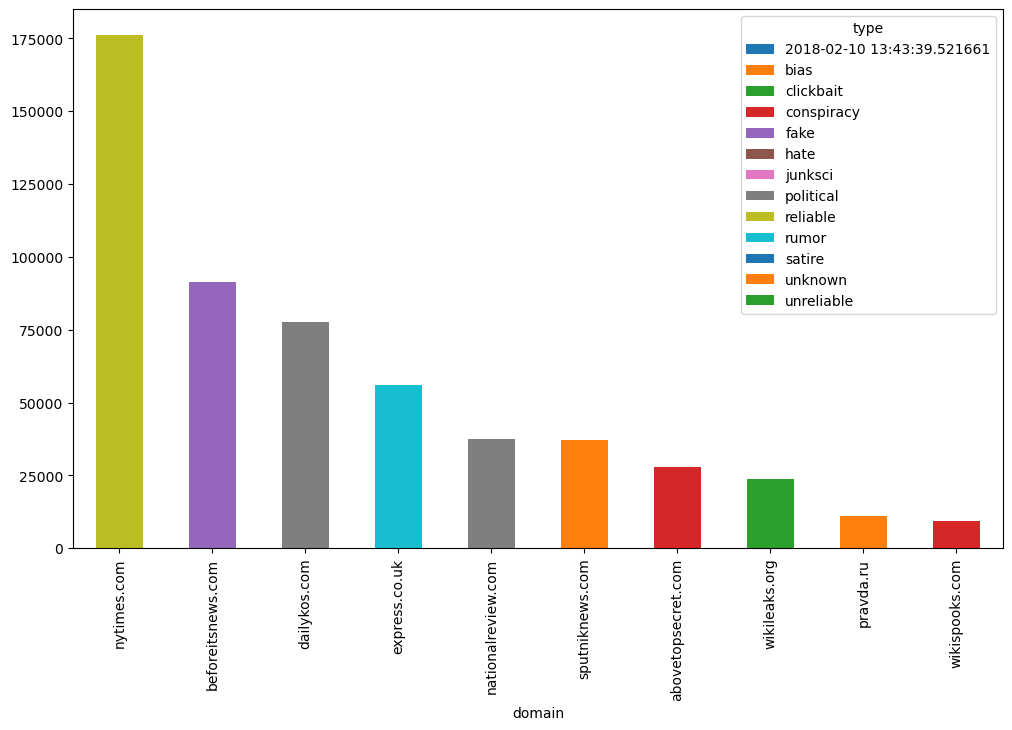

Reliable percent: 21.966231155778896


In [5]:
# see how many domains are in the dataset
domains = data['domain'].value_counts()
# print(domains)

# see if there are any missing values in ['domain']
missing_domain = data['domain'].isnull().sum()
# print('Missing domain:', missing_domain)

# see if how many domains have 'reliable' as their type
reliable_domains = data[data['type'] == 'reliable']['domain'].value_counts()
# print(reliable_domains)

# see for each domain how many reliable and fake news articles they have
reliable_fake = data.groupby(['domain', 'type']).size()
print(reliable_fake)


# see how many diferent types there are and print them
types = data['type'].value_counts()
print(types)


# plot 10 domains with the most articles and their type

reliable_fake = reliable_fake.unstack()
# fillna(0) replaces all NaN values with 0
reliable_fake = reliable_fake.fillna(0)
reliable_fake['total'] = reliable_fake['reliable'] + reliable_fake['fake'] + reliable_fake['satire'] + reliable_fake['bias'] + reliable_fake['conspiracy'] + reliable_fake['hate']+ reliable_fake['junksci'] + reliable_fake['clickbait'] + reliable_fake['unreliable'] + reliable_fake['political'] + reliable_fake['rumor'] + reliable_fake['unknown'] 
reliable_fake = reliable_fake.sort_values(by='total', ascending=False)
reliable_fake = reliable_fake.head(10)
reliable_fake = reliable_fake.drop(columns='total')
reliable_fake.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.show()


# print what percent of the articles are of type reliable
reliable_percent = types['reliable'] / total_rows * 100
print('Reliable percent:', reliable_percent)



In [7]:
# print(first_10['content'])
# first_10['content'] = first_10['content'].astype(str)
# # convert to csv
# # first_10.to_csv('first_10.csv', index=False)

# # # lower case
# first_10['content'] = first_10['content'].str.lower()

# # # should not contain multiple spaces, tabs or newlines
# first_10['content'] = first_10['content'].str.replace(r'[\s\xa0]+', ' ', regex=True)

# # remove punctuation
# first_10['content'] = first_10['content'].str.replace(r'[^\w\s]', '', regex=True)

# first_10.to_csv('first_10_cleaned.csv', index=False)

In [3]:
# print('Total rows:', total_rows)
# data['content'] = data['content'].astype(str)
# remove the rows with missing values in the 'type' column and in the 'content' column
data = data.dropna(subset=['type', 'content'])

# replace 'political' and 'clickbait' with 'reliable'
data['type'] = data['type'].replace(['political', 'clickbait'], 'reliable')

#  remove all the other types of news except 'reliable' and 'fake'
data = data[data['type'].isin(['reliable', 'fake'])]


print('Total rows after removing missing values:', data.shape[0])
data['content'] = data['content'].apply(cleanText)

# likely have to tokenize and stem the data like in the previous assignment, and then remove stopwords and count the vocabulary size
# data['content'] = data['content'].apply(cleanText)

# convert the first 50 rows to a csv file
# data.head(50).to_csv('before_cleaning.csv', index=False)


# # try cleaning it using the vectorized string methods
# data['content'] = data['content'].str.lower()
# # should not contain multiple spaces, tabs or newlines
# # text = re.sub(r'\s+', ' ', text)
# data['content'] = data['content'].str.replace(r'\s+', ' ', regex=True)

# # data.head(50).to_csv('aftercleaning_cleaning.csv', index=False)
# # replace dates with <DATE>
# date_pattern = r'\b(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)\s+\d{1,2}(?:,\s+|\s+)\d{4}\b|\b\d{4}-\d{2}-\d{2}\b'

# # date_pattern = r'\b(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)\s+\d{1,2},\s+\d{4}\b|\b\d{4}-\d{2}-\d{2}\b'
# # text = re.sub(date_pattern, '<DATE>', text)
# data['content'] = data['content'].str.replace(date_pattern, '<DATE>', regex=True)
# # nov. 5
# date_pattern2 = r'\b(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)\.\s+\d{1,2}\b'
# # text = re.sub(date_pattern2, '<DATE>', text)
# data['content'] = data['content'].str.replace(date_pattern2, '<DATE>', regex=True)

# # replace numbers with <NUM>
# # text = re.sub(r'\d+', '<NUM>', text)
# data['content'] = data['content'].str.replace(r'\d+', '<NUM>', regex=True)


# # replace urls with <URL>
# # text = re.sub(r'(http|https)://[^\s]*', '<URL>', text)
# data['content'] = data['content'].str.replace(r'(http|https)://[^\s]*', '<URL>', regex=True)

# # replace emails with <EMAIL>
# # text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w{2,4}\b', '<EMAIL>', text)
# data['content'] = data['content'].str.replace(r'\b[\w\.-]+@[\w\.-]+\.\w{2,4}\b', '<EMAIL>', regex=True)

# # remove punctuation
# # text = re.sub(r'[^\w\s]', '', text)
# data['content'] = data['content'].str.replace(r'[^\w\s]', '', regex=True)

# data.head(50).to_csv('aftercleaning_cleaning.csv', index=False)

print("finished cleaning the data")



Total rows after removing missing values: 545376
finished cleaning the data


In [4]:
# tokenize the data
data['tokens'] = data['content'].apply(nltk.word_tokenize)




In [3]:

# nltk.download('snowball_data')
# stem the data
from nltk.stem.snowball import SnowballStemmer

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
# stemmed_data = [stemmer.stem(token) for token in filtered_tokens]
def process_tokens(tokens):
    # remove stopwords
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # stemming
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    return stemmed_tokens

# remove stopwords
# stop_words = set(stopwords.words('english'))
# filtered_tokens = [token for token in tokens if token not in stop_words]
# data['processed_tokens'] = data['tokens'].apply(process_tokens)

# remove rows that have empty 'content' or empty 'type' from the first 1000 rows
# first_1000 = first_1000.dropna(subset=['content', 'type'])

# try on the 1000 data
# first_1000['content'] = first_1000['content'].astype(str)
# first_1000['content'] = first_1000['content'].apply(cleanText)
# first_1000['tokens'] = first_1000['content'].apply(nltk.word_tokenize)
# first_1000['processed_tokens'] = first_1000['tokens'].apply(process_tokens).apply(lambda x: ' '.join(x))

# other good data
# data['processed_tokens'] = data['tokens'].apply(process_tokens).apply(lambda x: ' '.join(x))

# read the cleaned_stemmed file to test it all
cleaned_stemmed = pd.read_csv('995,000_cleaned_stemmed2.csv', dtype=str)

# remove rows that have empty 'content' or empty 'type' from the cleaned_stemmed file
# cleaned_stemmed = cleaned_stemmed.dropna(subset=['content', 'type'])
print("finished stemming the data")
# print(data.columns)
# print(cleaned_stemmed.columns)


finished stemming the data


In [4]:
cleaned_stemmed = cleaned_stemmed.dropna(subset=['type', 'content'])

# replace 'political' and 'clickbait' with 'reliable'
cleaned_stemmed['type'] = cleaned_stemmed['type'].replace(['political', 'clickbait'], 'reliable')

# replace 'bias' and 'satite' with 'fake'
cleaned_stemmed['type'] = cleaned_stemmed['type'].replace(['bias', 'satire'], 'fake')
#  remove all the other types of news except 'reliable' and 'fake'
cleaned_stemmed = cleaned_stemmed[cleaned_stemmed['type'].isin(['reliable', 'fake'])]

print('Total rows after removing missing values:', cleaned_stemmed.shape[0]) 

print(cleaned_stemmed['type'].value_counts())

# percent reliable
reliable_percent = cleaned_stemmed['type'].value_counts()['reliable'] / cleaned_stemmed.shape[0] * 100
print('Reliable percent:', reliable_percent)

Total rows after removing missing values: 691768
type
reliable    440493
fake        251275
Name: count, dtype: int64
Reliable percent: 63.6764059626927


In [6]:
# convert first 1000 to csv
# first_1000.to_csv('cleaned_first_1000.csv', index=False)

# convert the data to csv
data.to_csv('cleaned_tokenized_stemmed_Bigdata.csv', index=False)

In [8]:
# convert the first 50 rows to a csv file
# data.head(50).to_csv('cleaned_Bigdata.csv', index=False)

print(data.columns)



Index(['Unnamed: 0', 'id', 'domain', 'type', 'url', 'content', 'scraped_at',
       'inserted_at', 'updated_at', 'title', 'authors', 'keywords',
       'meta_keywords', 'meta_description', 'tags', 'summary', 'source',
       'tokens', 'processed_tokens'],
      dtype='object')


In [1]:
print(data.columns)

NameError: name 'data' is not defined

In [29]:

# X = CountVectorizer.fit_transform(first_1000['processed_tokens'])
# 'reliable', 'political', 'clickbait' make them all have 'type' reliable
cleaned_stemmed['type'] = cleaned_stemmed['type'].replace(['political', 'clickbait'], 'reliable')

#  remove all the other types of news except 'reliable' and 'fake'
cleaned_stemmed = cleaned_stemmed[cleaned_stemmed['type'].isin(['reliable', 'fake'])]

# number of rows left
print('Number of rows left:', cleaned_stemmed.shape[0])



Number of rows left: 545376


In [5]:
# using sklean to split the data training, validation and test data. 80% training, 10% validation and 10% test
# from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


CountVectorizer = CountVectorizer()

from sklearn.model_selection import train_test_split

# X = CountVectorizer.fit_transform(cleaned_stemmed['content'])
# X = CountVectorizer.fit_transform(data['processed_tokens'])

tfidvec = TfidfVectorizer(stop_words='english',max_df=0.7) #max_df=0.7 means that we ignore terms that appear in more than 70% of the documents, and only focus on the less frequent ones, which could be more informative
X = tfidvec.fit_transform(cleaned_stemmed['content'])


X_train, X_test_1, y_train, y_test_1  = train_test_split(X, cleaned_stemmed['type'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_1, y_test_1, test_size=0.5, random_state=42)

# print("X_train: ", X_train)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

logistic_model = LogisticRegression(max_iter=3500, random_state=42)



scale = StandardScaler(with_mean=False)

X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)

logistic_model.fit(X_train, y_train)

c:\Users\atta_\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000, random_state=42)

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = logistic_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("accuracy: ", accuracy)
# print("precision score: ", precision_score(y_val, y_pred, average='weighted'))
# print("recall score: ", recall_score(y_val, y_pred, average='weighted'))
# print("f1 score: ", f1_score(y_val, y_pred, average='weighted'))


accuracy:  0.8262283707012447


In [11]:
# now trying a different model

from sklearn import svm

clf = svm.LinearSVC(max_iter=5000, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("accuracy: ", accuracy)

c:\Users\atta_\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\atta_\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


accuracy:  0.809821183341284


In [ ]:
# trying a different model



# tfidvec = TfidfVectorizer(stop_words='english',max_df=0.7) #max_df=0.7 means that we ignore terms that appear in more than 70% of the documents, and only focus on the less frequent ones, which could be more informative
# X = tfidvec.fit_transform(cleaned_stemmed['content'])

# X_train, X_test_1, t_train, t_test_1  = train_test_split(X, cleaned_stemmed['type'], test_size=0.2, random_state=42)
# X_val, X_test, t_val, t_test = train_test_split(X_test_1, t_test_1, test_size=0.5, random_state=42)




In [12]:
# naive bayes
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(X_train, y_train)

MultinomialNB()

In [13]:
y_pred = naive.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("accuracy: ", accuracy)

accuracy:  0.7889905604463912


In [13]:
# check percent of reliable in data
number_of_reliable = cleaned_stemmed['type'].value_counts()['reliable']
number_of_fake = cleaned_stemmed['type'].value_counts()['fake']

percent_reliable = number_of_reliable / (number_of_reliable + number_of_fake) * 100
print("percent reliable: ", percent_reliable)

percent_face = number_of_fake / (number_of_reliable + number_of_fake) * 100
print("percent fake: ", percent_face)

percent reliable:  63.6764059626927
percent fake:  36.3235940373073


In [15]:
extra_data = pd.read_csv('collected_articles.csv', dtype=str)


In [18]:
# print(extra_data.columns)
# create a new csv with the 'content' and type columns and give all the articles the type 'reliable'
extra_data = extra_data[['content']]
extra_data['type'] = 'reliable'

print(extra_data.columns)

Index(['content', 'type'], dtype='object')


In [20]:
cleaned_data = pd.read_csv('cleaned_tokenized_stemmed_Bigdata.csv', dtype=str)

# clean the extra data
extra_data['content'] = extra_data['content'].apply(cleanText)




In [21]:
# tokenize the extra data
extra_data['tokens'] = extra_data['content'].apply(nltk.word_tokenize)

In [29]:
# stem the extra data
extra_data['processed_tokens'] = extra_data['tokens'].apply(process_tokens).apply(lambda x: ' '.join(x))


In [32]:
# now add the extra data to the cleaned_data
data_with_extra = pd.concat([cleaned_data, extra_data], ignore_index=True)

# remove any rows with missing values in the 'processed_tokens' column
data_with_extra = data_with_extra.dropna(subset=['processed_tokens'])


In [33]:
X = CountVectorizer.fit_transform(data_with_extra['processed_tokens'])

X_train, X_test_1, y_train, y_test_1  = train_test_split(X, data_with_extra['type'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_1, y_test_1, test_size=0.5, random_state=42)

In [34]:
logistic_model = LogisticRegression(max_iter=2000, random_state=42)

scale = StandardScaler(with_mean=False)

X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)

logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [35]:
y_pred = logistic_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("accuracy: ", accuracy)

accuracy:  0.8735107591920525


In [ ]:
# print(result.head())

# pattern_URL = r'(http|https)://[^\s]*'
# pattern_NUM = r'\d+'

# number_of_numbers = 0

# data['content'] = data['content'].apply(cleanText)
 
# for content in data['content']:
#     number_of_numbers += len(re.findall(pattern_NUM, content))

# def process_part_of_data(data):
#     data['content'] = data['content'].apply(cleanText)
#     return data


# chunk_size = 9950

# chunks = list(pd.read_csv('995,000_rows.csv', chunksize=chunk_size))
# # print("number of chunks: ", len(chunks))

# with Pool() as pool:
#     final_chunks = pool.map(process_part_of_data, chunks)

# final_data = pd.concat(final_chunks)

# for chunk in pd.read_csv('995,000_rows.csv', chunksize=chunk_size):
#     with Pool(4) as p:
#         data = p.map(process_part_of_data, [chunk])
#         print(data)
#         # data.to_csv('cleaned_Bigdata.csv', index=False)

    


In [ ]:
# print(data['content'].head(10))

